# DECISON TREE

# Admission predict

# Problem Statement:
The objective of the dataset is to predict a students chance to get into a particular university

The data set contains several parameters which are considered important during the application of Masters program, and is inspired by the UCLA Graduate data set

The dataset consists of several predictor variables and one target variable, Chance of Admit. The target variable has values ranging from 0 to 1, the value determines the probability of a student getting into that university

# ***Data Definition***
The real-valued features are as follows:

1) GRE Scores: GRE score (out of 340) of a student

2) University Rating: University rating on a 1 to 5 scale

3) TOEFL Scores: TOEFL score (out of 120) of a student

4) Statement of Purpose and Letter of Recommendation Strength: measuring the recommendation strength on scale of 5

5) Undergraduate GPA: GPA of a student in undergraduate course, measured on a 10 point scale

6) Research Experience: either 0 or 1, which means yes or now whether a students has a research experience

Output variable (desired target):

11) Chance of Admit - values ranging from 0 to 1, which gives the probability of getting into the chosen university

# Imorting Libraries

In [2]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import shapiro , pearsonr
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
import missingno as msn

In [3]:
def miss_val(x):
    miss_val =[]
    for i in x.columns:
        for j in x[i]:
            if x[x[i].isna()].shape[0]>=1:
                miss_val.extend(x[x[i].isna()].index)
    return miss_val

            
            
def univariate_outlier(x):
    q1 = df[x].describe().T["25%"]
    q3 = df[x].describe().T["75%"]
    iqr = q3-q1
    inner = q1 -1.5*iqr
    outer = q3 +1.5*iqr
    out=[]
    for i,j in df[x].iteritems():
        if inner<j<outer:
            pass
        else:
            out.append(j)
    return out

def feature_box_kde_normality(x):
    normality_test(df[x])
    out=univariate_outlier(x)
    if len(out)==0:
        print(f"There is no outlier in {x}")
    else:
        print("Outlier :",out)
    f,(ax1,ax2) = plt.subplots(1,2,figsize=[15,3])
    sns.boxplot(data=df,x=x,ax=ax1)
    sns.kdeplot(data=df,x=x,ax=ax2)
    
def normality_test(x):
    s,p = shapiro(x)
    print(f"The statistic value is {s} with p-value : {p}")
    if p>0.05:
        print(f"{x.name} is normally distributed")
    else:
        print(f"{x.name} is not normally distributed")
        
def missing_values(df):
    for i in df.columns:
        df[i].fillna(df[i].mode()[0],inplace=True)
        
def feature_analysis(x):
    a = df[x].unique()
    d = df[x].value_counts()
    b = df[x].value_counts(normalize = True)
    c = df[x].isna().sum()
    print('unique_values:', a,'value_counts:',d,'proportion of value:', b,'count of nan values:', c)
    
def count_plot(x):
    fig, (axis)  = plt.subplots(1, 1,figsize=(10,7))
    sns.countplot(x=df[x], data=df, ax=axis)
    plt.title('Count Plot for Categorical Variable ',x, fontsize = 15)

def high_frequency(x):
    sns.countplot(df[x])
    print('the variable with more frequency is', df[x].mode()[0])
    
def comparison_plot(x,y):
    fig,(axis1) = plt.subplots(1,1,figsize=(15,10))
    sns.countplot(x=df[x], hue= y ,data=df, ax = axis1)
    plt.show()
    
def multi_comparison (x,y,z):
    fig, (axis1)  = plt.subplots(1, 1,figsize=(20,5))
    sns.barplot(x=df[x], y= df[y], hue=df[z], data=df, ax=axis1)
    

def cat_dtype_change(x):
    df[x]= df[x].astype('object')
    df[x].info()
    
def model_build(x_train, y_train):
    Logit_Model = LogisticRegression()
    Logit_Model.fit(x_train,y_train)
    decision_tree = DecisionTreeClassifier(criterion = 'entropy')
    decision_tree.fit(x_train,y_train)
    random_forest = RandomForestClassifier(n_estimators=10)
    random_forest.fit(x_train, y_train)
    models = {'logis': Logit_Model, 'decision tree': decision_tree, 'random_forest': random_forest}
    return models

def train_test(x,y):
    x_encoded = pd.get_dummies(x, drop_first=True)
    scaler = StandardScaler()
    scaler.fit(x_encoded)
    x1 = scaler.fit_transform(x_encoded)
    x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=45)
    

def count_pie(x):
    plt.figure(figsize = (15,5))
    explode = [0.15,0]
    plt.subplot(121)
    df[x].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
    plt.subplot(122)
    sns.countplot(data = df, x = df[x])
    print('the variable with more frequency is', df[x].mode()[0])
        


# import data

In [4]:
df = pd.read_csv('admission.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
df.columns= list(map(lambda x:x.lower().replace(' ','_'),df.columns))

In [6]:
# it gives the information about the dataset and also datatypes of columns/variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   serial_no.         500 non-null    int64  
 1   gre_score          500 non-null    int64  
 2   toefl_score        500 non-null    int64  
 3   university_rating  500 non-null    int64  
 4   sop                500 non-null    float64
 5   lor_               500 non-null    float64
 6   cgpa               500 non-null    float64
 7   research           500 non-null    int64  
 8   chance_of_admit_   500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
# it gives the hw man rows and columns in a dataset
df.shape

(500, 9)

# MISSING VALUES

In [8]:
# we have to check whether there is a missing values in the dataset if there is missing values impute them with mode 
 #mode is for both categorical and numerical data 

In [9]:
# We use this "isna function" to find missing values inthe data otherwise called as nan values
df.isna().sum()

serial_no.           0
gre_score            0
toefl_score          0
university_rating    0
sop                  0
lor_                 0
cgpa                 0
research             0
chance_of_admit_     0
dtype: int64

In [10]:
# to find the proportion of the missing values we use this function
df.isna().sum()/df.shape[0]*100

serial_no.           0.0
gre_score            0.0
toefl_score          0.0
university_rating    0.0
sop                  0.0
lor_                 0.0
cgpa                 0.0
research             0.0
chance_of_admit_     0.0
dtype: float64

<AxesSubplot:>

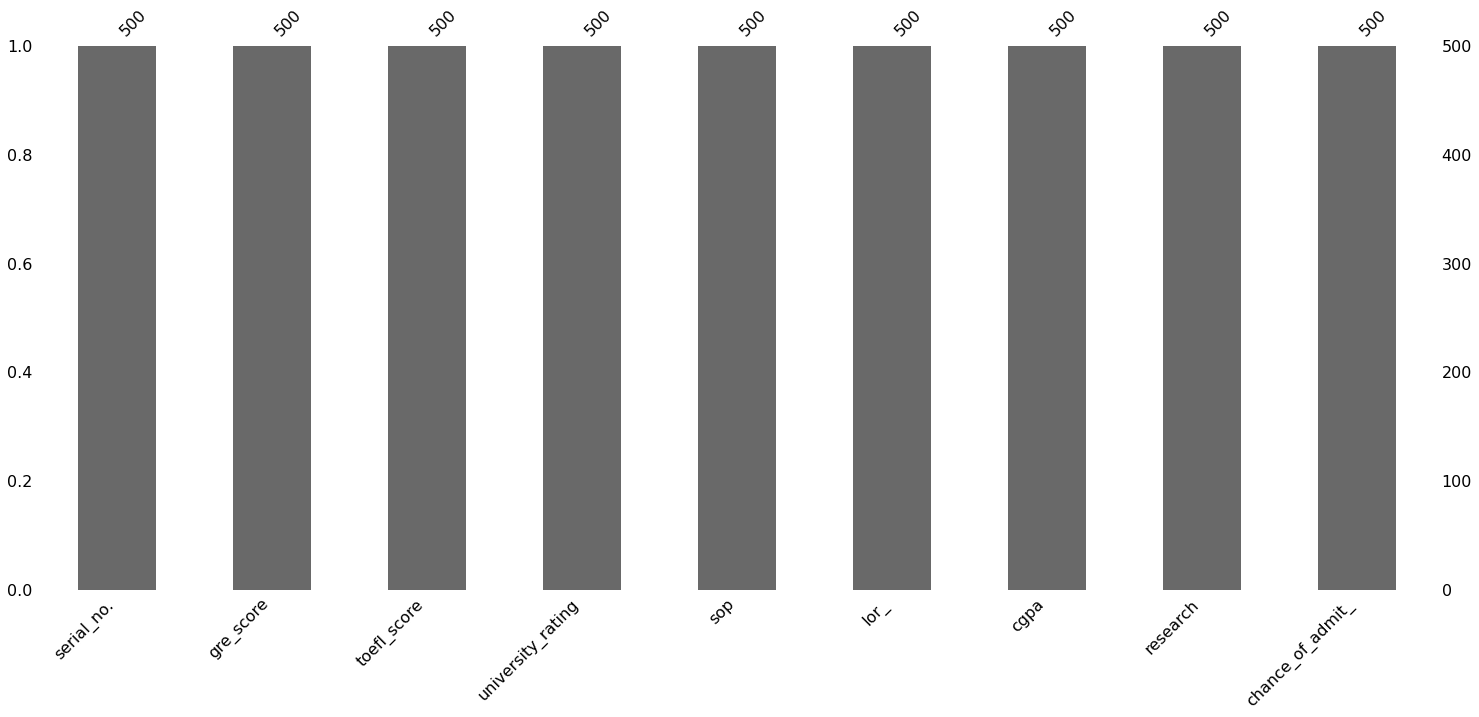

In [11]:
# Checking NaN values we can use this plot
msn.bar(df)

# Ques 1 a) Visualizing the 10 random rows from the data set


In [33]:
df.sample(10)

,serial_no.,gre_score,toefl_score,university_rating,sop,lor_,cgpa,research,chance_of_admit_
467,468,318,101,5,3.5,5.0,8.78,1,0.78
344,345,295,96,2,1.5,2.0,7.34,0,0.47
283,284,321,111,3,2.5,3.0,8.90,1,0.80
231,232,319,106,3,3.5,2.5,8.33,1,0.74
60,61,309,100,2,3.0,3.0,8.10,0,0.48
436,437,310,110,1,1.5,4.0,7.23,1,0.58
373,374,321,109,3,3.0,3.0,8.54,1,0.79
440,441,305,104,2,2.5,1.5,7.79,0,0.53
311,312,328,108,4,4.5,4.0,9.18,1,0.84
123,124,308,108,3,3.5,3.5,8.22,0,0.61


In [34]:
cm = sns.color_palette("blend:pink,black", as_cmap=True)
df.describe().style.background_gradient(cmap = cm,axis = None)

,serial_no.,gre_score,toefl_score,university_rating,sop,lor_,cgpa,research,chance_of_admit_
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.484000,8.576440,0.560000,0.721740
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.925450,0.604813,0.496884,0.141140
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000,0.630000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [35]:
# Dropping sl_no column since it acts as an index. 

df.drop(columns =['serial_no.'],inplace = True)

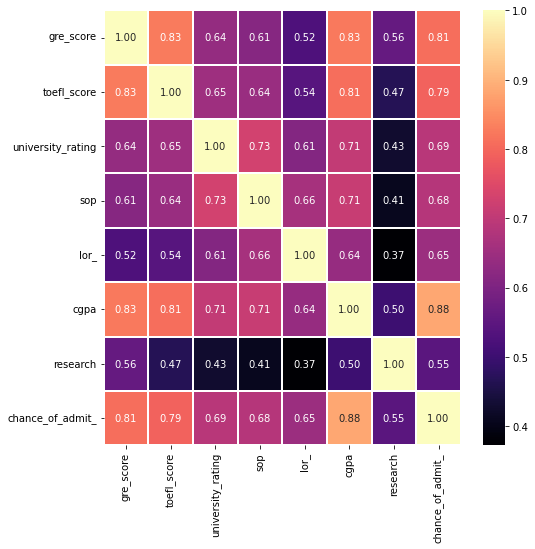

In [36]:
# Generate the correlation matrix
plt.figure(figsize =(8, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

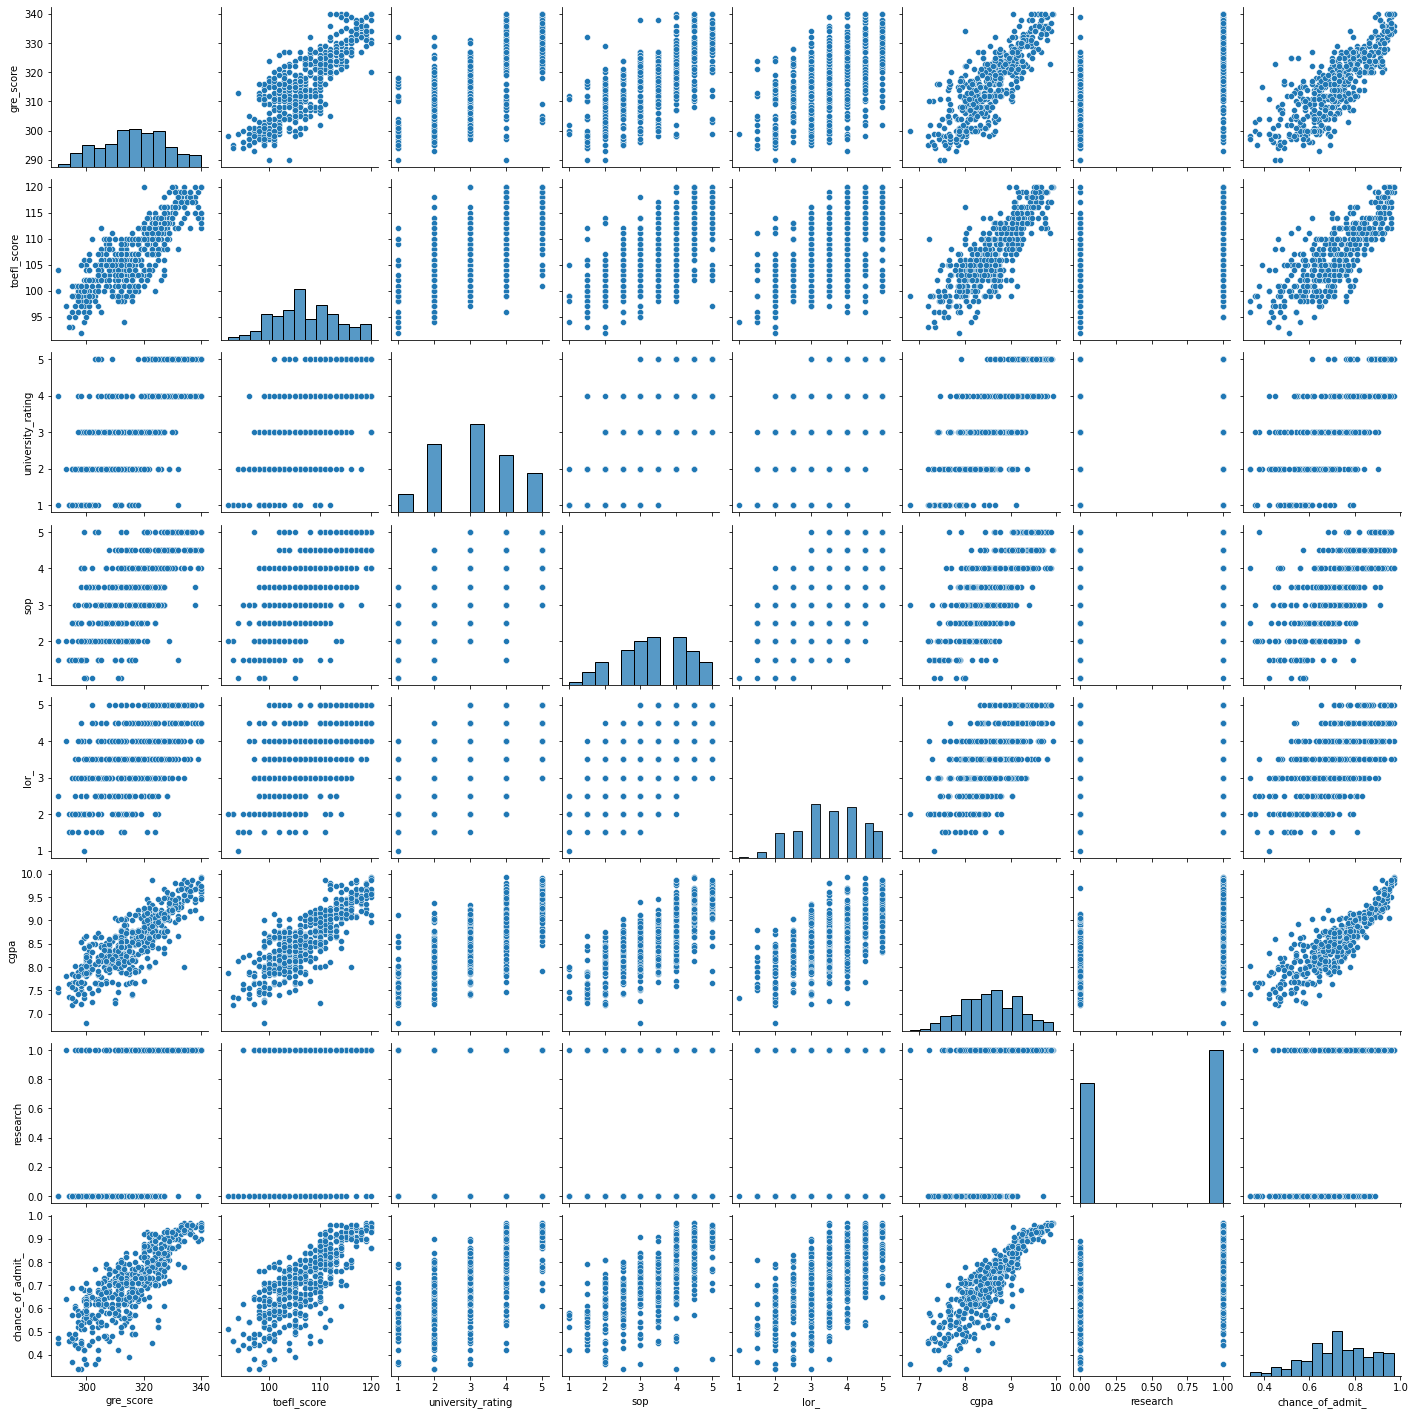

In [37]:
# Generate a correlogram
sns.pairplot(df)
plt.show()

# Ques2 Minimum and maximum values for GRE score

In [38]:

print("Max GREScore :", max(df['gre_score']))
print("Min GREScore :", min(df['gre_score']))

Max GREScore : 340
Min GREScore : 290


In [39]:
 # Minimum and maximum values for TOEFL score
print("Max GREScore :", max(df['toefl_score']))
print("Min GREScore :", min(df['toefl_score']))

Max GREScore : 120
Min GREScore : 92


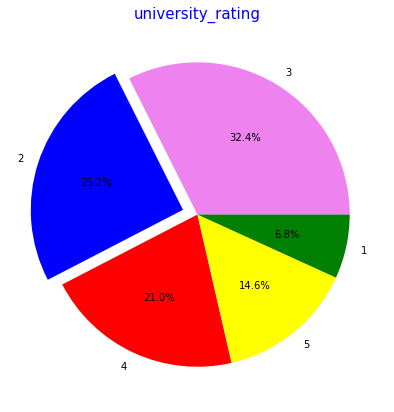

In [40]:
# Percentage of universities for each universtiy rating
colors = ['violet','blue','red','yellow','green']
explode = [0,0.1,0,0,0]
plt.figure(figsize = (7,7))
plt.pie(df['university_rating'].value_counts().values, explode = explode, labels = df['university_rating'].value_counts().index, colors = colors, autopct ='%1.1f%%')
plt.title('university_rating',color='blue',fontsize=15)
plt.show()

In [41]:
# Ques 4) Converting the target variable 'Chance of Admit' to categorical
# In order to perform this, we will first separate the target variable

# Set of independent variables
x = df.iloc[:,:-1]

# Target variable
y = df.iloc[:,-1]

# Splitting the data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state = 45)

In [44]:
# Converting the target variable to categorical having values 0 and 1
y_train_c = [1 if each > 0.80 else 0 for each in y_train]
y_test_c = [1 if each > 0.80 else 0 for each in y_test]

In [45]:
len(y_train_c)

350

# 5. Building a DT model

# Ques 5) Build a decision tree classifier

In [46]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy',random_state = 100, max_depth = 3, min_samples_leaf = 5)
decision_tree.fit(x_train,y_train_c)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [47]:
from sklearn.metrics import confusion_matrix


In [48]:
print('Decison Tree Training')
train_pred = decision_tree.predict(x_train)
print('training results', decision_tree)
print(classification_report(y_train_c, train_pred))
cm= confusion_matrix(y_train_c, train_pred)
print('Confusion matrix')
print(cm)
print('\n')
print('Decison Tree testing')
test_pred = decision_tree.predict(x_test)
print('training results', decision_tree)
print(classification_report(y_test_c, test_pred))
cm= confusion_matrix(y_test_c, test_pred)
print('Confusion matrix')
print(cm)

Decison Tree Training
training results DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       256
           1       0.89      0.90      0.89        94

    accuracy                           0.94       350
   macro avg       0.92      0.93      0.93       350
weighted avg       0.94      0.94      0.94       350

Confusion matrix
[[245  11]
 [  9  85]]


Decison Tree testing
training results DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       102
           1       0.86      0.88      0.87        48

    accuracy                           0.91       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.91      0.91      0.91   

# HYPER TUNING

In [28]:
# Again creating a decision tree classifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 200, max_depth = 4, min_samples_leaf = 10)

In [29]:
# Training the model 
clf_fit_2 = clf_gini.fit(x_train, y_train_c) 

# Predicting the chance of admission
y_pred_2 = clf_fit_2.predict(x_test) 

In [30]:
# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test_c, y_pred_2)

0.92

# 6.  RANDOM FOREST

In [50]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(x_train, y_train_c)

RandomForestClassifier(n_estimators=10)

# comparison 

In [54]:
models = {'decision tree': decision_tree, 'random_forest': random_forest}

In [57]:
def results(x_train, x_test, y_train_c, y_test_c, models):
    for model_name , model in models.items():
        train_pred = model.predict(x_train)
        print('training results', model_name)
        print(classification_report(y_train_c, train_pred))
        cm= confusion_matrix(y_train_c, train_pred)
        print('Confusion matrix')
        print('/n')
        print(cm)
    
        print('Test Results')
        test_pred = model.predict(x_test)
        print(classification_report(y_test_c, test_pred))
        cm =confusion_matrix(y_test_c, test_pred)
        print('Confusion matrix')
        print(cm)


        print("---------------------------------------------------")
    

In [59]:
results(x_train,x_test,y_train_c,y_test_c,models)

training results decision tree
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       256
           1       0.89      0.90      0.89        94

    accuracy                           0.94       350
   macro avg       0.92      0.93      0.93       350
weighted avg       0.94      0.94      0.94       350

Confusion matrix
/n
[[245  11]
 [  9  85]]
Test Results
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       102
           1       0.86      0.88      0.87        48

    accuracy                           0.91       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.91      0.91      0.91       150

Confusion matrix
[[95  7]
 [ 6 42]]
---------------------------------------------------
training results random_forest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       256
           1       1.00      0.